# Forecasting the sales of a furniture store

### Abstract:
One of the most important tasks for any retail store company is to analyze the performance of its stores. The main challenge faced by any retail store is predicting in advance the sales and inventory required at each store to avoid overstocking and under-stocking. This helps the business to provide the best customer experience and avoid getting into losses, thus ensuring the store is sustainable for operation.

### Problem Statement:
Read the superstore data and forecast about the sales of furniture for the next year.

### Dataset Information:
The data set contains information about products, sales, profits, and so on that you can use to identify key areas for improvement within the furniture company.

### Scope:
* Understanding time series data
* Checking components of time series 
* Forecasting using various time series techniques
* Understanding the visualization involved in time series

### Learning Outcome:
The students will get a better understanding about trends and seasonality in time series data. Understand the difference between prediction and forecasting.

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the dataset
df = pd.read_excel(r'Sample - Superstore.xls', header=0)

# Printing the head
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Checking shape
df.shape

(9994, 21)

In [4]:
# Checking different categories present in the data.
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

* We have 4 years worth of data 2014-2017.
* For furniture, we have 2121 observations.
* Total observations = 9994.

In [5]:
# Creating a new DataFrame with observations for Furniture.
furniture = df[df['Category'] == 'Furniture']

# Checking/printing the new DataFrame (furniture)
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [6]:
# Checking shape of new DF
furniture.shape

(2121, 21)

In [7]:
# Checking datatypes for new DF
furniture.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

* We confirm that the date variables have the correct datatype, i.e. datetime64.

In [8]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [9]:
# Single Dimensional Data (date/time, Y, No X)
# Subsetting the date column and target variable

furniture = furniture[['Order Date', 'Sales']]
furniture.shape

(2121, 2)

In [10]:
# Sorting the data in the chronological order and checking for null values.

furniture = furniture.sort_values('Order Date', ascending=True)
furniture.isnull().sum()

# We confirm we have no null values

Order Date    0
Sales         0
dtype: int64

In [11]:
furniture.head(10)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [12]:
# Checking if date variable values are repeated.

furniture['Order Date'].value_counts()

2016-09-05    10
2016-12-25     9
2016-12-01     9
2017-11-19     9
2017-10-30     9
              ..
2015-11-26     1
2015-11-24     1
2015-11-22     1
2015-11-19     1
2017-12-30     1
Name: Order Date, Length: 889, dtype: int64

* By value_counts(), we get the first row onwards as 10 .. 9 .. 8, etc
    * This confirms that our dates are repeated.

In [13]:
# Group the data on basis of the date variable

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.shape

(889, 2)

In [14]:
# Confirming no date variables are repeated

furniture['Order Date'].value_counts()

2014-01-06    1
2016-11-23    1
2016-11-10    1
2016-11-11    1
2016-11-12    1
             ..
2015-08-02    1
2015-08-05    1
2015-08-06    1
2015-08-07    1
2017-12-30    1
Name: Order Date, Length: 889, dtype: int64

In [15]:
furniture.head(10)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


In [16]:
furniture = furniture.set_index('Order Date')
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [17]:
furniture.shape

(889, 1)

In [18]:
# Checking if we have missing date enrties.
# Checking if we have Equally spaced time intervals.

In [19]:
# We see from .head() that we do have missing entries
# Using resample to convert days to week.

y = furniture['Sales'].resample("W").mean()

# We use mean because we have data on every day basis.

In [20]:
print(y.shape)
y

# 208 records confirm that there are no missing "week" entries. (4 years => 208 weeks (52*4))

(208,)


Order Date
2014-01-12     678.107000
2014-01-19     312.618250
2014-01-26     551.986000
2014-02-02     311.833000
2014-02-09      14.560000
                 ...     
2017-12-03    2286.881714
2017-12-10    1465.734000
2017-12-17     773.303167
2017-12-24    1212.340500
2017-12-31    1009.391200
Freq: W-SUN, Name: Sales, Length: 208, dtype: float64

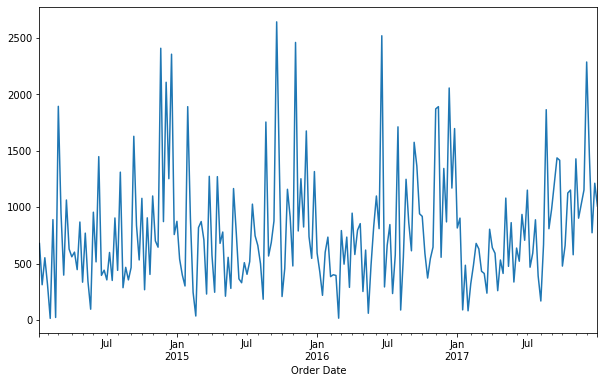

In [21]:
y.plot(figsize=(10, 6))
plt.show()

(48,)


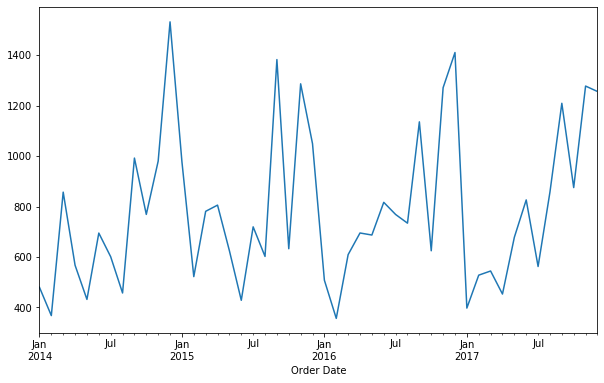

In [22]:
y = furniture['Sales'].resample("M").mean()
print(y.shape)
y.plot(figsize=(10, 6))
plt.show()

In [23]:
# Creating the Train data set.

train = y.loc[:'2016-12-31']
print(train.shape)
train

(36,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
Freq: M, Name: Sales, dtype: float64

In [24]:
# Creating the Test data set.

test = y.loc['2017-01-31':]
print(test.shape)
test

(12,)


Order Date
2017-01-31     397.602133
2017-02-28     528.179800
2017-03-31     544.672240
2017-04-30     453.297905
2017-05-31     678.302328
2017-06-30     826.460291
2017-07-31     562.524857
2017-08-31     857.881889
2017-09-30    1209.508583
2017-10-31     875.362728
2017-11-30    1277.817759
2017-12-31    1256.298672
Freq: M, Name: Sales, dtype: float64

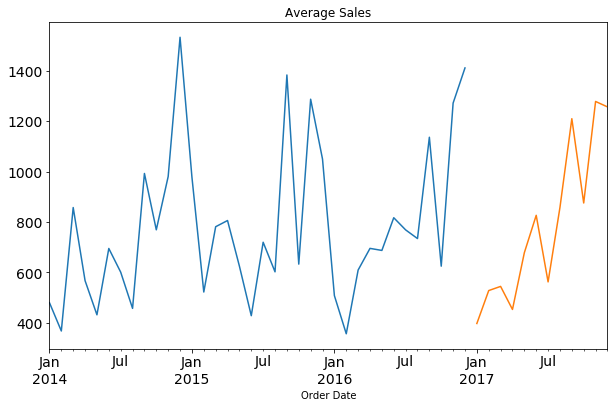

In [25]:
# Plotting data

train.plot(figsize=(10,6), title = 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title = 'Average Sales', fontsize=14)
plt.show()

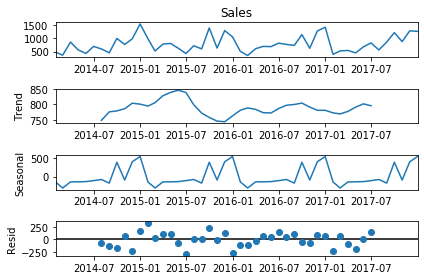

In [26]:
# Code to see/plot the components/parameters

#import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
decomposition.plot()
plt.show()

* We observe that we have seasonality.
    * The pattern is repeating every year
    * Since we passed data as per months, we will pass seasonal_periods = 12

### SimpleExpSmoothing

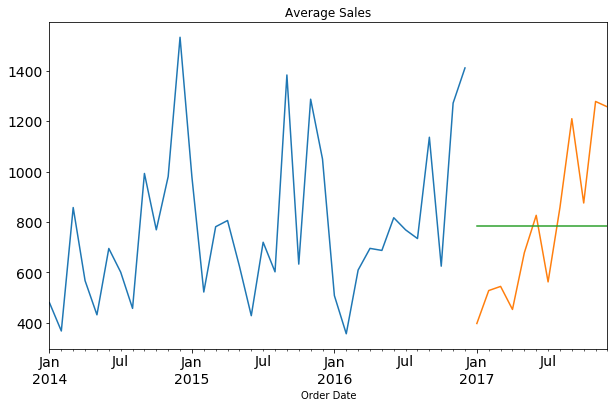

In [27]:
#from statsmodels.tsa.api import SimpleExpSmoothing

Exp_Smooth = test.copy()

fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.01)

Exp_Smooth['SES'] = fit1.forecast(steps=len(test)) # steps => how much to forecast
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [28]:
Exp_Smooth.SES

2017-01-31    784.196438
2017-02-28    784.196438
2017-03-31    784.196438
2017-04-30    784.196438
2017-05-31    784.196438
2017-06-30    784.196438
2017-07-31    784.196438
2017-08-31    784.196438
2017-09-30    784.196438
2017-10-31    784.196438
2017-11-30    784.196438
2017-12-31    784.196438
Freq: M, dtype: float64

In [29]:
# Checking AIC for our SimpleExpSmoothing model.

fit1.aic

415.8766421604106

In [30]:
# Checking RMSE for our SimpleExpSmoothing model.

#from sklearn.metrics import mean_squared_error
#from math import sqrt
rmse = sqrt(mean_squared_error(test, Exp_Smooth.SES))
print(rmse)

303.47669159034854


### Holt_linear

In [31]:
# Generating AIC values for all smoothing levels and smoothing trends

my_dict={}
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        #from statsmodels.tsa.api import Holt
        Holt_df = test.copy()
        fit1 = Holt(train).fit(smoothing_level = i,smoothing_trend = j)
        my_dict[i,j] = fit1.aic

In [32]:
# Finding the best values for smoothing level and smoothing trend giving lowest AIC.

for k in my_dict:
    if my_dict[k]==min(my_dict.values()):
        print(k,":",my_dict[k])

(0.01, 0.01) : 416.3237611622847


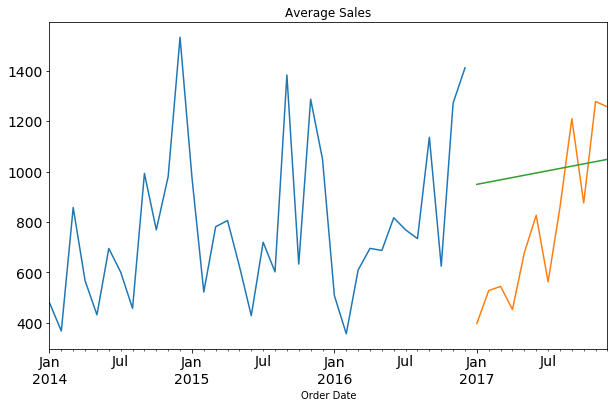

In [56]:
# Passing above parameter values

#from statsmodels.tsa.api import Holt
Holt_df = test.copy()

fit1 = Holt(train).fit(smoothing_level = 0.01, smoothing_slope = 0.01)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

Holt Linear model helps us plot a trend line instead of horizontal line.

In [57]:
Holt_df['Holt_linear']

2017-01-31     949.204322
2017-02-28     958.218571
2017-03-31     967.232819
2017-04-30     976.247068
2017-05-31     985.261316
2017-06-30     994.275565
2017-07-31    1003.289813
2017-08-31    1012.304061
2017-09-30    1021.318310
2017-10-31    1030.332558
2017-11-30    1039.346807
2017-12-31    1048.361055
Freq: M, dtype: float64

In [58]:
# Checking AIC for our Holt_linear model.

fit1.aic

416.3237611622847

In [59]:
# Checking RMSE for our Holt_linear model.

rmse = sqrt(mean_squared_error(test, Holt_df['Holt_linear']))
print(rmse)

346.5634866807878


### ExponentialSmoothing - Holt_Winter

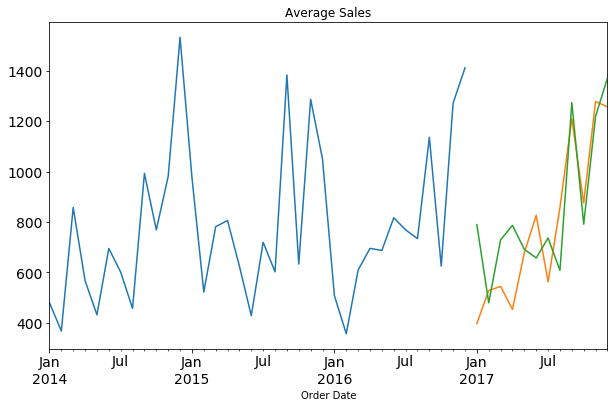

In [37]:
#from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()

fit1 = ExponentialSmoothing(train ,seasonal_periods=12,  # seasonal_periods=12 because we resampled as months
                            trend='add',
                            seasonal='add').fit()

Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [38]:
Holt_Winter_df['Holt_Winter']

2017-01-31     789.680005
2017-02-28     479.584734
2017-03-31     729.439086
2017-04-30     786.559963
2017-05-31     691.434904
2017-06-30     657.425822
2017-07-31     736.375194
2017-08-31     608.142529
2017-09-30    1273.170680
2017-10-31     791.498412
2017-11-30    1218.795005
2017-12-31    1370.720619
Freq: M, dtype: float64

In [39]:
# Checking AIC for our Holt_Winter model.

fit1.aic

392.3906248977125

In [40]:
# Checking RMSE for our Holt_Winter model.

rmse = sqrt(mean_squared_error(test, Holt_Winter_df['Holt_Winter']))
print(rmse)

193.71153000053764


### Evaluation metrics:

* AIC => Between models
* RMSE => Within models

<br>

* <u>Simple Exponential Smoothing</u>:
    * AIC => 415.87
    * RMSE => 303.47
    
<br>

* <u>Holt's Linear trend model</u>:
    * AIC => 416.32
    * RMSE => 346.56
    
<br>

* <u>Holt's Winter model</u>:
    * AIC => 392.39
    * RMSE => 193.71
    
**We confirm that Holt's Winter model gives us the lowest AIC and RMSE values**

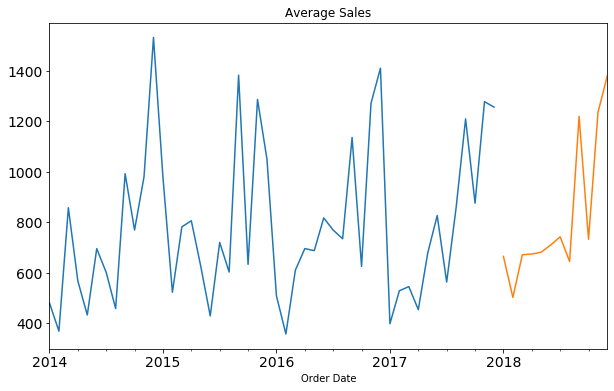

In [41]:
# We have trained and tested our model by spliting our data inro train and test sets.
# Here we will use all our data to train and forecast/predict for upcoming year.

#from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()

fit1 = ExponentialSmoothing(y ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()

Y_predictions = fit1.forecast(steps = 12) # steps = 24, for 2 years
 
y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [42]:
Y_predictions

2018-01-31     664.341129
2018-02-28     501.794722
2018-03-31     670.912114
2018-04-30     673.735483
2018-05-31     681.301838
2018-06-30     709.684705
2018-07-31     742.008111
2018-08-31     644.212039
2018-09-30    1219.650751
2018-10-31     732.282445
2018-11-30    1235.436666
2018-12-31    1382.697075
Freq: M, dtype: float64

In [43]:
# Dumping our predictions to an excel file.

Y_predictions.to_excel("TimeSeriesOutput.xlsx", header=["Sales"], index=True)

# ARIMA

## Box-Jenkins Method:
* 1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()
* 2.Estimation-build the model using the optimum values
* 3.Validation-interpret how good is the model by validation testing
* 4.Forecasting- forecast for future time periods

In [44]:
#!pip install pmdarima --user

import pmdarima as pm

#### Identification step

In [45]:
model = pm.auto_arima(y, start_p=0, max_p=3, d=None, max_d=2, start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=524.319, Time=0.03 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=503.080, Time=0.10 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=502.081, Time=0.05 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=502.468, Time=0.13 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=499.444, Time=0.06 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=497.244, Time=0.13 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=495.283, Time=0.40 sec
 ARIMA(2,2,0)(3,1,0)[12]             : AIC=497.128, Time=0.74 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=0.75 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(2,2,0)(3,1,1)[12]             : AIC=inf, Time=0.74 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=503.589, Time=0.32 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=490.119, T

In [46]:
model.aic()

489.41762612467426

#### Estimation step

In [47]:
#from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order=(3,2,0), seasonal_order=(1,1,0,12)).fit()

#### Validation step

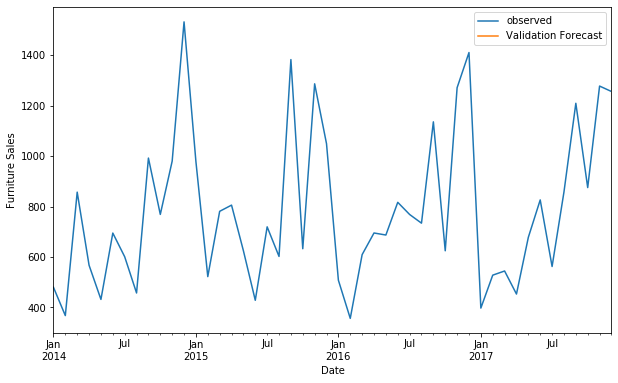

In [48]:
pred = model.get_prediction(start=pd.to_datetime('2017-01-31'))
#pred = model.get_forecast(steps=24)

plt.figure(figsize=(10,6))
ax = y.plot(label = 'observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [49]:
pred.predicted_mean

2017-01-31    818.524057
Freq: M, dtype: float64

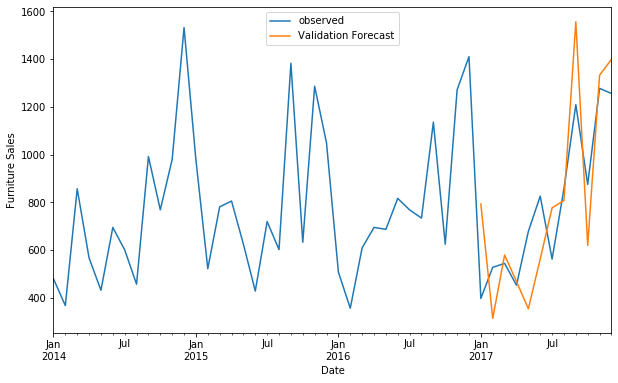

In [50]:
# Using y instead of train

model = SARIMAX(y, order=(3,2,0), seasonal_order=(1,1,0,12)).fit()

pred = model.get_prediction(start=pd.to_datetime('2017-01-31'))
#pred = model.get_forecast(steps=24)

plt.figure(figsize=(10,6))
ax = y.plot(label = 'observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [51]:
pred.predicted_mean

Order Date
2017-01-31     792.949435
2017-02-28     314.265632
2017-03-31     579.803131
2017-04-30     468.932392
2017-05-31     354.687212
2017-06-30     562.948848
2017-07-31     777.172660
2017-08-31     807.929709
2017-09-30    1556.342090
2017-10-31     620.158823
2017-11-30    1332.648295
2017-12-31    1399.290959
Freq: M, Name: predicted_mean, dtype: float64

In [52]:
Y_pred = pred.predicted_mean
Y_test = y['2017-01-31':]

#from sklearn.metrics import mean_squared_error
#from math import sqrt
rms = sqrt(mean_squared_error(Y_test, Y_pred))
print(rms)

230.0628531231436


#### Forecasting

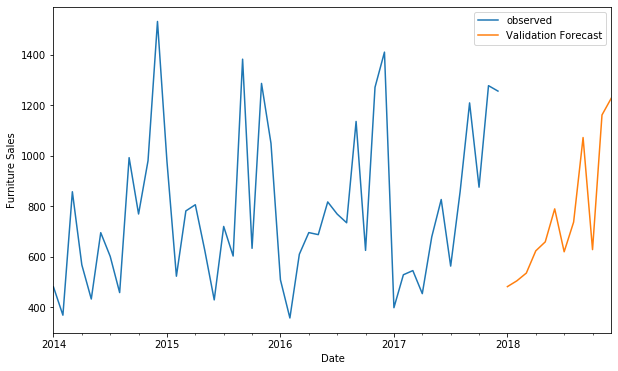

In [53]:
# Forecasting instead of predicting
# Using y instead of train

model = SARIMAX(y, order=(3,2,0), seasonal_order=(1,1,0,12)).fit()

#pred = model.get_prediction(start=pd.to_datetime('2017-01-31'))
pred = model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
ax = y.plot(label = 'observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [54]:
pred.predicted_mean

2018-01-31     481.175779
2018-02-28     504.162667
2018-03-31     534.896805
2018-04-30     623.058241
2018-05-31     658.537438
2018-06-30     789.387666
2018-07-31     619.269505
2018-08-31     736.930509
2018-09-30    1072.136409
2018-10-31     627.864087
2018-11-30    1161.662874
2018-12-31    1229.291145
Freq: M, Name: predicted_mean, dtype: float64

In [55]:
# Dumping our predictions to an excel file.
pred.predicted_mean.to_excel("TimeSeriesOutput_ARIMA.xlsx", index=True)